# Predicting Insurance Claim Amount for the Healthcare Sector

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
#Importing File
df=pd.read_csv('/Users/apple/desktop/Andhra_Health_Data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479688 entries, 0 to 479687
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Sno               479688 non-null  int64 
 1   AGE               479688 non-null  int64 
 2   SEX               479688 non-null  object
 3   CASTE_NAME        479688 non-null  object
 4   CATEGORY_CODE     479688 non-null  object
 5   CATEGORY_NAME     479688 non-null  object
 6   SURGERY_CODE      479688 non-null  object
 7   SURGERY           479688 non-null  object
 8   VILLAGE           479688 non-null  object
 9   MANDAL_NAME       479688 non-null  object
 10  DISTRICT_NAME     479688 non-null  object
 11  PREAUTH_DATE      479688 non-null  object
 12  PREAUTH_AMT       479688 non-null  int64 
 13  CLAIM_DATE        479688 non-null  object
 14  CLAIM_AMOUNT      479688 non-null  int64 
 15  HOSP_NAME         479688 non-null  object
 16  HOSP_TYPE         479688 non-null  obj

In [4]:
#It appears we have 3 outliers PREAUTH_AMT, CLAIM_AMOUNT, DIS_SUR_DAYS to be dealt with
df.describe()

,Sno,AGE,PREAUTH_AMT,CLAIM_AMOUNT
count,479688.0000,479688.000000,479688.000000,479688.000000
mean,239844.5000,44.912264,30428.941698,27652.205861
std,138474.1423,18.961084,27441.592281,25951.706037
min,1.0000,0.000000,5.000000,2.000000
25%,119922.7500,34.000000,12500.000000,12500.000000
50%,239844.5000,47.000000,25000.000000,23200.000000
75%,359766.2500,59.000000,35000.000000,30600.000000
max,479688.0000,107.000000,520000.000000,520000.000000


In [5]:
#Check if Sno (Indexing) totals the number of rows
df.Sno.nunique()==df.shape[0]

True

In [6]:
#Checking missing values
missing=df.isna().sum()
missing[missing>0]

DISCHARGE_DATE      4560
MORTALITY_DATE    469566
dtype: int64

In [7]:
# Replacing 4559 / 4560 missing values in the Discharge Date Column by the Values in the Mortality Date Column
df.loc[df['DISCHARGE_DATE'].isna() & df['MORTALITY_DATE'].notna()]

def date_rep(df):
    df.loc[df['DISCHARGE_DATE'].isna(),'DISCHARGE_DATE']=df.loc[df['DISCHARGE_DATE'].isna(),'MORTALITY_DATE']
    df=df.drop(df.loc[df['DISCHARGE_DATE'].isna()].index)
    return df

df=date_rep(df)

#### Checking the unique values for each of the categorical features to be adopted in our LinReg

In [8]:
#Creating Dummies and Drop list
dummies_list=[]
drop_list=[]

In [9]:
df.AGE.unique()

array([ 56,  37,  50,  45,  54,  35,  52,  73,  49,  65,  75,   1,  48,
        57,  55,  74,  31,  68,  72,  66,  42,  63,  26,  59,  58,  69,
        53,  40,  10,  70,  17,  64,  60,  43,  47,  51,   0,  24,  46,
        38,  44,  23,  30,  71,  27,  61,  41,  15,  32,  28,   8,  19,
        14,  16,  62,  67,  22,  13,   3,  85,  33,  21,  12,  20,  11,
        29,  34,  39,  36,  25,  18,  79,   7,  77,   5,   2,   9,  80,
         4,  81,   6,  90,  86,  83,  76,  78,  82,  88,  84,  92,  89,
        96,  91,  87,  95,  94,  93, 100, 101, 107,  97,  99])

In [10]:
df.SEX.unique()

array(['Female', 'Male', 'Male(Child)', 'Female(Child)', 'FEMALE', 'MALE'],
      dtype=object)

In [11]:
#Grouping replicated gender classification as either Male or Female
df.replace({'Female':'female', 'Male':'male', 'Male(Child)':'male', 'Female(Child)':'female', 'FEMALE':'female', 'MALE':'male'},inplace=True)

In [12]:
dummies_list.append('SEX')

In [13]:
df.CASTE_NAME.unique()

array(['BC', 'OC', 'SC', 'Minorities', 'ST', 'Others'], dtype=object)

In [14]:
dummies_list.append('CASTE_NAME')

In [15]:
dummies_list.append('CATEGORY_NAME')

In [16]:
df.DISTRICT_NAME.unique()

array(['Srikakulam', 'Kurnool', 'Vizianagaram', 'Guntur',
       'Vishakhapatnam', 'West Godavari', 'Krishna', 'East Godavari',
       'Prakasam', 'Nellore', 'YSR Kadapa', 'Chittoor', 'Anantapur'],
      dtype=object)

In [17]:
dummies_list.append('DISTRICT_NAME')

In [18]:
df.HOSP_TYPE.unique()

array(['G', 'C'], dtype=object)

In [19]:
dummies_list.append('HOSP_TYPE')

In [20]:
df.HOSP_DISTRICT.unique()

array(['Srikakulam', 'Kurnool', 'Vishakhapatnam', 'Guntur', 'Hyderabad',
       'Ranga Reddy', 'Prakasam', 'East Godavari', 'Nellore', 'Krishna',
       'YSR Kadapa', 'Chittoor', 'Vizianagaram', 'Anantapur',
       'West Godavari', 'Khammam', 'Warangal', 'Karimnagar', 'Nizamabad',
       'Mahabubnagar'], dtype=object)

In [21]:
dummies_list.append('HOSP_DISTRICT')

In [22]:
df['Mortality Y / N'].unique()

array(['NO', 'YES'], dtype=object)

In [23]:
#Changing name of the Mortality Y / N Column
df.rename(columns={"Mortality Y / N": "MORTALITY_YN"},inplace=True)

In [24]:
dummies_list.append('MORTALITY_YN')

In [25]:
df.SRC_REGISTRATION.unique()

array(['D', 'P', 'MC', 'CMO'], dtype=object)

In [26]:
dummies_list.append('SRC_REGISTRATION')

In [27]:
df.DISCHARGE_DATE=df.DISCHARGE_DATE.str.replace('/','-').str.replace('0116','2016')
df=df.drop(df.index[148162])

def days_diff(df,a,b,c):
    df['X']=df[a].str[:10]
    df['Y']=df[b].str[:10]

    df.X=df.X.apply(str).map(lambda x: datetime.datetime.strptime(x, "%d-%m-%Y").date())
    df.Y=df.Y.apply(str).map(lambda x: datetime.datetime.strptime(x, "%d-%m-%Y").date())

    df[c]=(df.Y-df.X)
    df=df.drop(columns=['X','Y'])

    df[c]=(df[c].map(str).str.split(" ").apply(lambda x: x[0])).astype(int)
    return df

In [28]:
#Calculating the time difference between Discharge Date and Surgery Date as total days 
#Appending it to a new col DIS_SUR_DAYS
df=days_diff(df,'SURGERY_DATE','DISCHARGE_DATE','DIS_SUR_DAYS')

In [29]:
#Calculating the time difference between Claim Date and Preauth Date as total days 
#Appending it to a new col PRE_CLA_DAYS
df=days_diff(df,'PREAUTH_DATE','CLAIM_DATE','PRE_CLA_DAYS')

In [30]:
df.DIS_SUR_DAYS.unique()

array([  32,   64,   34,   18,    2,    8,   19,    5,    9,    6,    1,
         10,  136,    4,    7,   26,   14,    3,   12,   15,  608,  176,
        718,  670,  622,   25,  635,   29,   21,   43,   90,  244,  683,
         65,  485,   24,  565,   69,  559,   17,  311,  533,   13,    0,
         54,   31,   67,  531,   28,   16,   11,   22,   75,  548,   35,
        494,  465,  520,   30,   23,  510,   20,   98,   47,   41,   81,
         73,   76,   93,   38,   27,   44,   53,   39,   55,  105,   60,
        443,   36,  472,   45,  182,   84,   50,   59,   68,  458,   -4,
        125,  454,   51,   33,  225,   70,  120,   62,  102,  359,   42,
        312,   74,   95,  448,  362,  361,  231,   87,  109,  420,   -6,
        370,  447,  371,   37,  163,  154,  342,  226,   77,  341,  130,
        308,  158,  304,  127,  152,  118,  124,  386,  298,  419,   58,
        112,  108,   40,  450,  382,  289,  212,  275,   -1,  189,  283,
        211,   61,   94,   48,  100,  294,  268,  3

In [31]:
df.PRE_CLA_DAYS.unique()

array([1327, 1324, 1321, 1306, 1302, 1300, 1258,  983,  982, 1196,  959,
        954,  953,  950,  947,   99,  936,  935,  896, 1012,  929, 1010,
        928, 1009, 1200, 1004,  922,  631,  910,  905,  900,  899,  894,
        892,  890,  886,  884,  883,  881,  877,  864,  863,  625,  854,
        853,  850,  826,  196,  839,  834,  831,  830,  827,  824,  821,
        820,  699,  813,  807,  805,  988,  784,  745,  943,  774,  750,
        572,  729,  728,  898,  726,  942,  698,  711,  309,  659,  757,
        924,  921,  654,  907,  734,  930,  697,  978,  975,  623,  887,
         97,  651,  876,  644,  576,  585,  343,  390,  568,  582,  684,
        761,  702,  845,  569,  841,  364,  570,  836,  557,  835,  554,
        566,  667,  563,  555,  558,  792,  556,  822,  549,  687,  652,
        819,  751,  544,  541,  645,  686,  543,  209,  537,  466,  655,
        630,  635,  527,  526,  517,  663,  795,  627,  321,  519,  518,
        516,  532,  531,  782,  529,  515,  603,  5

In [32]:
#We have 250 rows where the Surgery Date is ahead of Discharge Date (Which doesnt make sense) -> Drop them
df.loc[df.DIS_SUR_DAYS<0]

,Sno,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,...,HOSP_NAME,HOSP_TYPE,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,MORTALITY_YN,MORTALITY_DATE,SRC_REGISTRATION,DIS_SUR_DAYS,PRE_CLA_DAYS
388,389,68,male,BC,M11,ENDOCRINOLOGY,M11.1.1,Medical management of Pyelonephritis in uncont...,Venkatarayuni Gudem,Ponduru,...,King George Hospital,G,Vishakhapatnam,06-11-2015 00:00,02-11-2015 00:00,YES,02-11-2015 00:00,MC,-4,509
975,976,51,male,BC,M2,GENERAL MEDICINE,M2.4,Medical Management of Cerebral Malaria,Kantaram,Koyyuru,...,King George Hospital,G,Vishakhapatnam,21-12-2015 00:00,15-12-2015 00:00,YES,15-12-2015 00:00,D,-6,516
1704,1705,25,male,ST,M7,NEUROLOGY,M7.3,Medical Management of Hemorrhagic Stroke/Strok...,Gudem Kotha Veedhi,Gudem Kothaveedhi,...,King George Hospital,G,Vishakhapatnam,23-02-2016 00:00,22-02-2016 00:00,YES,22-02-2016 00:00,P,-1,345
2002,2003,20,female,BC,S14,PLASTIC SURGERY,S14.2.2.3,Surgical Management of above 60% mixed burns,Thikkavaram,Chillakur,...,S.V.R.R.Hospital,G,Chittoor,04-03-2016 00:00,07-02-2016 00:00,YES,07-02-2016 00:00,D,-26,480
2218,2219,44,female,BC,M7,NEUROLOGY,M7.3,Medical Management of Hemorrhagic Stroke/Strok...,Ward-12,Visakhapatnam,...,King George Hospital,G,Vishakhapatnam,23-02-2016 00:00,17-02-2016 00:00,YES,17-02-2016 00:00,D,-6,332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411713,411714,28,male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,3rd Ward,Tirupati(Mc),...,Sri Venkateswara Institute Of Medical Sciences,G,Chittoor,04-09-2017 00:00,23-08-2017 00:00,YES,23-08-2017 00:00,D,-12,63
414537,414538,32,female,OC,M5,CARDIOLOGY,M5.1.5,Medical Management of Refractory Cardiac Failure,Kuppam,Kuppam,...,Pes Institute Of Medical Sciences And Research...,C,Chittoor,11-08-2017 00:00,10-08-2017 00:00,YES,10-08-2017 00:00,D,-1,54
430950,430951,78,female,OC,M7,NEUROLOGY,M7.4,Medical Management of Ischemic Strokes,9th Ward,Kadiri Muncipality,...,Sri Venkateswara Institute Of Medical Sciences,G,Chittoor,06-09-2017 00:00,30-08-2017 00:00,YES,30-08-2017 00:00,D,-7,115
436905,436906,61,male,BC,M8,PULMONOLOGY,M8.7,Medical Management of Acute Respiratory Failur...,S.Mydukur,S Mydukur,...,Sri Venkateswara Institute Of Medical Sciences,G,Chittoor,09-09-2017 00:00,03-09-2017 00:00,YES,03-09-2017 00:00,D,-6,114


In [33]:
df.drop(df.loc[df.DIS_SUR_DAYS<0].index, inplace=True)

In [34]:
#Adding New Columns : SURG_MONTH, SURG_YEAR to study potential effect of Month & Year of Surgery on Claim Amount
#Adding New Column : AGE_SQRD to study the quadratic effect of Age
df['SURG_MONTH']=(df.SURGERY_DATE.str[3:5]).astype(int)
df['SURG_YEAR']=(df.SURGERY_DATE.str[6:11]).astype(int)
df['AGE_SQRD'] = df['AGE']**2

In [35]:
#Dummy List
dummies_list

['SEX',
 'CASTE_NAME',
 'CATEGORY_NAME',
 'DISTRICT_NAME',
 'HOSP_TYPE',
 'HOSP_DISTRICT',
 'MORTALITY_YN',
 'SRC_REGISTRATION']

In [36]:
#Dropping unneccessary features
drop_list = ['Sno', 'CATEGORY_CODE', 'SURGERY_CODE', 'SURGERY', 
             'VILLAGE', 'MANDAL_NAME', 'HOSP_NAME','MORTALITY_DATE',
             'PREAUTH_AMT','PREAUTH_DATE','CLAIM_DATE','SURGERY_DATE',
             'DISCHARGE_DATE']

df.drop(drop_list, axis=1, inplace=True)

In [37]:
#Remove Outliers above 99 percentile, based on observations 
df=df.drop(df.loc[df['CLAIM_AMOUNT'] > df['CLAIM_AMOUNT'].quantile(q=0.99)].index)
df=df.drop(df.loc[df['DIS_SUR_DAYS'] > df['DIS_SUR_DAYS'].quantile(q=0.99)].index)


In [45]:
df.isna().sum()

AGE                 0
SEX                 0
CASTE_NAME          0
CATEGORY_NAME       0
DISTRICT_NAME       0
CLAIM_AMOUNT        0
HOSP_TYPE           0
HOSP_DISTRICT       0
MORTALITY_YN        0
SRC_REGISTRATION    0
DIS_SUR_DAYS        0
PRE_CLA_DAYS        0
SURG_MONTH          0
SURG_YEAR           0
AGE_SQRD            0
dtype: int64

In [38]:
df

,AGE,SEX,CASTE_NAME,CATEGORY_NAME,DISTRICT_NAME,CLAIM_AMOUNT,HOSP_TYPE,HOSP_DISTRICT,MORTALITY_YN,SRC_REGISTRATION,DIS_SUR_DAYS,PRE_CLA_DAYS,SURG_MONTH,SURG_YEAR,AGE_SQRD
0,56,female,BC,NEPHROLOGY,Srikakulam,11000,G,Srikakulam,NO,D,32,1327,8,2013,3136
1,37,male,BC,NEPHROLOGY,Srikakulam,11000,G,Srikakulam,NO,D,32,1324,8,2013,1369
3,45,male,BC,NEPHROLOGY,Srikakulam,11000,G,Srikakulam,NO,D,34,1306,8,2013,2025
4,54,male,BC,NEPHROLOGY,Srikakulam,11000,G,Srikakulam,NO,D,32,1302,8,2013,2916
5,35,male,OC,NEPHROLOGY,Srikakulam,11000,G,Srikakulam,NO,P,32,1302,8,2013,1225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479683,22,female,BC,GYNAECOLOGY AND OBSTETRICS SURGERY,Nellore,24910,C,Nellore,NO,D,4,42,11,2017,484
479684,60,male,BC,MEDICAL ONCOLOGY,Prakasam,45910,C,Guntur,NO,D,1,43,11,2017,3600
479685,38,male,OC,POLY TRAUMA,Nellore,30000,C,Nellore,NO,D,2,42,11,2017,1444
479686,59,male,OC,OPHTHALMOLOGY SURGERY,West Godavari,23020,C,Guntur,NO,D,2,42,11,2017,3481


#### Created a clean DF named : df

#############################################################################################################################

In [39]:
#Creating new DF with Dummy Columns : df_dum
df_dum=pd.get_dummies(data=df, columns=dummies_list, drop_first=True)

In [40]:
df_dum.head()

,AGE,CLAIM_AMOUNT,DIS_SUR_DAYS,PRE_CLA_DAYS,SURG_MONTH,SURG_YEAR,AGE_SQRD,SEX_male,CASTE_NAME_Minorities,CASTE_NAME_OC,...,HOSP_DISTRICT_Srikakulam,HOSP_DISTRICT_Vishakhapatnam,HOSP_DISTRICT_Vizianagaram,HOSP_DISTRICT_Warangal,HOSP_DISTRICT_West Godavari,HOSP_DISTRICT_YSR Kadapa,MORTALITY_YN_YES,SRC_REGISTRATION_D,SRC_REGISTRATION_MC,SRC_REGISTRATION_P
0,56,11000,32,1327,8,2013,3136,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,37,11000,32,1324,8,2013,1369,1,0,0,...,1,0,0,0,0,0,0,1,0,0
3,45,11000,34,1306,8,2013,2025,1,0,0,...,1,0,0,0,0,0,0,1,0,0
4,54,11000,32,1302,8,2013,2916,1,0,0,...,1,0,0,0,0,0,0,1,0,0
5,35,11000,32,1302,8,2013,1225,1,0,1,...,1,0,0,0,0,0,0,0,0,1


In [46]:
df_dum.shape

(470268, 76)

In [47]:
df_dum.dtypes.unique()

array([dtype('int64'), dtype('uint8')], dtype=object)

In [48]:
#Dropped Claim_Amount column as it is chosen to be out dependant variable
df_dum.drop('CLAIM_AMOUNT',  axis=1, inplace=True)

In [49]:
df_dum.shape

(470268, 75)

In [50]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

In [51]:
y=df.CLAIM_AMOUNT
X=df_dum

In [52]:
#Creating our first model : model
model=sm.OLS(y,add_constant(X))

In [53]:
model_fit=model.fit()

In [54]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           CLAIM_AMOUNT   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                 1.245e+04
Date:                Fri, 01 May 2020   Prob (F-statistic):               0.00
Time:                        22:26:36   Log-Likelihood:            -5.1180e+06
No. Observations:              470268   AIC:                         1.024e+07
Df Residuals:                  470192   BIC:                         1.024e+07
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                             -9.447e+05   1.32e+05     -7.181      0.000    -1.2e+06   -6.87e+05
AGE                                                 -93.5558      5.252    -17.812      0.000    -103.850     -83.261
DIS_SUR_DAYS                                        280.8480      2.488    112.900      0.000     275.972     285.724
PRE_CLA_DAYS                                          0.4509      0.399      1.131      0.258      -0.330       1.232
SURG_MONTH                                           55.0838      7.962      6.919      0.000      39.479      70.688
SURG_YEAR                                           505.2050     65.212      7.747      0.000     377.392     633.018
AGE_SQRD                                              1.1406      0.057     20.020      0.000       1.029       1.252
SEX_male                                            775.6693     41.117     18.865      0.000     695.082     856.257
CASTE_NAME_Minorities                               188.6740     83.201      2.268      0.023      25.602     351.746
CASTE_NAME_OC                                        38.6007     48.594      0.794      0.427     -56.643     133.844
CASTE_NAME_Others                                  -771.1050    676.449     -1.140      0.254   -2096.924     554.714
CASTE_NAME_SC                                      -241.1844     55.335     -4.359      0.000    -349.638    -132.730
CASTE_NAME_ST                                      -176.4951    117.391     -1.503      0.133    -406.577      53.587
CATEGORY_NAME_CARDIOLOGY                           -4.83e+04    116.306   -415.270      0.000   -4.85e+04   -4.81e+04
CATEGORY_NAME_CRITICAL CARE                       -2.493e+04    281.425    -88.602      0.000   -2.55e+04   -2.44e+04
CATEGORY_NAME_DERMATOLOGY                          -5.11e+04   1435.114    -35.608      0.000   -5.39e+04   -4.83e+04
CATEGORY_NAME_ENDOCRINOLOGY                       -5.667e+04    578.354    -97.985      0.000   -5.78e+04   -5.55e+04
CATEGORY_NAME_ENT  SURGERY                        -5.802e+04    140.569   -412.728      0.000   -5.83e+04   -5.77e+04
CATEGORY_NAME_GASTROENTEROLOGY                     -4.93e+04    217.933   -226.239      0.000   -4.97e+04   -4.89e+04
CATEGORY_NAME_GENERAL MEDICINE                    -5.047e+04    358.777   -140.661      0.000   -5.12e+04   -4.98e+04
CATEGORY_NAME_GENERAL SURGERY                     -4.567e+04    109.814   -415.922      0.000   -4.59e+04   -4.55e+04
CATEGORY_NAME_GENITO URINARY SURGERIES            -4.697e+04     95.220   -493.270      0.000   -4.72e+04   -4.68e+04
CATEGORY_NAME_GYNAECOLOGY AND OBSTETRICS  SURGERY -4.954e+04    226.238   -218.993      0.000      -5e+04   -4.91e+04
CATEGORY_NAME_I

In [55]:
droped_col=[]
def func(column,X):
    if column:
        X=X.drop(column, axis=1)
    model=sm.OLS(y,add_constant(X))
    model_fit=model.fit()
    display(model_fit.summary())
    droped_col.append(column)
    return X

In [72]:
X=func('DISTRICT_NAME_Kurnool',X)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           CLAIM_AMOUNT   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                 1.583e+04
Date:                Fri, 01 May 2020   Prob (F-statistic):               0.00
Time:                        22:45:01   Log-Likelihood:            -5.1181e+06
No. Observations:              470268   AIC:                         1.024e+07
Df Residuals:                  470208   BIC:                         1.024e+07
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                             -8.677e+05   1.11e+05     -7.813      0.000   -1.09e+06    -6.5e+05
AGE                                                 -93.5388      5.250    -17.815      0.000    -103.830     -83.248
DIS_SUR_DAYS                                        281.1851      2.466    114.012      0.000     276.351     286.019
SURG_MONTH                                           52.0112      7.467      6.966      0.000      37.377      66.646
SURG_YEAR                                           467.0775     55.060      8.483      0.000     359.162     574.993
AGE_SQRD                                              1.1422      0.057     20.057      0.000       1.031       1.254
SEX_male                                            776.6474     41.111     18.891      0.000     696.070     857.224
CASTE_NAME_Minorities                               188.8865     80.981      2.332      0.020      30.166     347.607
CASTE_NAME_SC                                      -243.6714     52.533     -4.638      0.000    -346.635    -140.708
CATEGORY_NAME_CARDIOLOGY                          -4.832e+04    115.515   -418.274      0.000   -4.85e+04   -4.81e+04
CATEGORY_NAME_CRITICAL CARE                       -2.495e+04    281.217    -88.739      0.000   -2.55e+04   -2.44e+04
CATEGORY_NAME_DERMATOLOGY                         -5.114e+04   1434.917    -35.641      0.000    -5.4e+04   -4.83e+04
CATEGORY_NAME_ENDOCRINOLOGY                       -5.667e+04    578.255    -98.010      0.000   -5.78e+04   -5.55e+04
CATEGORY_NAME_ENT  SURGERY                        -5.803e+04    139.858   -414.926      0.000   -5.83e+04   -5.78e+04
CATEGORY_NAME_GASTROENTEROLOGY                    -4.931e+04    217.871   -226.340      0.000   -4.97e+04   -4.89e+04
CATEGORY_NAME_GENERAL MEDICINE                    -5.046e+04    358.436   -140.784      0.000   -5.12e+04   -4.98e+04
CATEGORY_NAME_GENERAL SURGERY                     -4.569e+04    109.030   -419.060      0.000   -4.59e+04   -4.55e+04
CATEGORY_NAME_GENITO URINARY SURGERIES            -4.699e+04     94.364   -497.920      0.000   -4.72e+04   -4.68e+04
CATEGORY_NAME_GYNAECOLOGY AND OBSTETRICS  SURGERY -4.955e+04    225.822   -219.414      0.000      -5e+04   -4.91e+04
CATEGORY_NAME_INFECTIOUS DISEASES                 -4.873e+04   5766.596     -8.450      0.000      -6e+04   -3.74e+04
CATEGORY_NAME_MEDICAL ONCOLOGY                    -6.719e+04     84.722   -793.009      0.000   -6.74e+04    -6.7e+04
CATEGORY_NAME_NEPHROLOGY                          -6.609e+04    100.748   -656.009      0.000   -6.63e+04   -6.59e+04
CATEGORY_NAME_NEUROLOGY                           -5.333e+04    132.704   -401.886      0.000   -5.36e+04   -5.31e+04
CATEGORY_NAME_N

In [73]:
#List of Columns dropped to achieve the required P-values < 0.05
droped_col

['HOSP_DISTRICT_West Godavari',
 'HOSP_DISTRICT_Warangal',
 'HOSP_DISTRICT_YSR Kadapa',
 'HOSP_DISTRICT_Mahabubnagar',
 'HOSP_DISTRICT_Nizamabad',
 'HOSP_DISTRICT_Khammam',
 'DISTRICT_NAME_YSR Kadapa',
 'PRE_CLA_DAYS',
 'CASTE_NAME_OC',
 'CASTE_NAME_Others',
 'CASTE_NAME_ST',
 'DISTRICT_NAME_Prakasam',
 'DISTRICT_NAME_Srikakulam',
 'HOSP_DISTRICT_Kurnool',
 'HOSP_DISTRICT_Vizianagaram',
 'DISTRICT_NAME_Kurnool']

In [74]:
# Get the model outside of the function
model=sm.OLS(y,add_constant(X))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           CLAIM_AMOUNT   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                 1.583e+04
Date:                Fri, 01 May 2020   Prob (F-statistic):               0.00
Time:                        22:47:25   Log-Likelihood:            -5.1181e+06
No. Observations:              470268   AIC:                         1.024e+07
Df Residuals:                  470208   BIC:                         1.024e+07
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                             -8.677e+05   1.11e+05     -7.813      0.000   -1.09e+06    -6.5e+05
AGE                                                 -93.5388      5.250    -17.815      0.000    -103.830     -83.248
DIS_SUR_DAYS                                        281.1851      2.466    114.012      0.000     276.351     286.019
SURG_MONTH                                           52.0112      7.467      6.966      0.000      37.377      66.646
SURG_YEAR                                           467.0775     55.060      8.483      0.000     359.162     574.993
AGE_SQRD                                              1.1422      0.057     20.057      0.000       1.031       1.254
SEX_male                                            776.6474     41.111     18.891      0.000     696.070     857.224
CASTE_NAME_Minorities                               188.8865     80.981      2.332      0.020      30.166     347.607
CASTE_NAME_SC                                      -243.6714     52.533     -4.638      0.000    -346.635    -140.708
CATEGORY_NAME_CARDIOLOGY                          -4.832e+04    115.515   -418.274      0.000   -4.85e+04   -4.81e+04
CATEGORY_NAME_CRITICAL CARE                       -2.495e+04    281.217    -88.739      0.000   -2.55e+04   -2.44e+04
CATEGORY_NAME_DERMATOLOGY                         -5.114e+04   1434.917    -35.641      0.000    -5.4e+04   -4.83e+04
CATEGORY_NAME_ENDOCRINOLOGY                       -5.667e+04    578.255    -98.010      0.000   -5.78e+04   -5.55e+04
CATEGORY_NAME_ENT  SURGERY                        -5.803e+04    139.858   -414.926      0.000   -5.83e+04   -5.78e+04
CATEGORY_NAME_GASTROENTEROLOGY                    -4.931e+04    217.871   -226.340      0.000   -4.97e+04   -4.89e+04
CATEGORY_NAME_GENERAL MEDICINE                    -5.046e+04    358.436   -140.784      0.000   -5.12e+04   -4.98e+04
CATEGORY_NAME_GENERAL SURGERY                     -4.569e+04    109.030   -419.060      0.000   -4.59e+04   -4.55e+04
CATEGORY_NAME_GENITO URINARY SURGERIES            -4.699e+04     94.364   -497.920      0.000   -4.72e+04   -4.68e+04
CATEGORY_NAME_GYNAECOLOGY AND OBSTETRICS  SURGERY -4.955e+04    225.822   -219.414      0.000      -5e+04   -4.91e+04
CATEGORY_NAME_INFECTIOUS DISEASES                 -4.873e+04   5766.596     -8.450      0.000      -6e+04   -3.74e+04
CATEGORY_NAME_MEDICAL ONCOLOGY                    -6.719e+04     84.722   -793.009      0.000   -6.74e+04    -6.7e+04
CATEGORY_NAME_NEPHROLOGY                          -6.609e+04    100.748   -656.009      0.000   -6.63e+04   -6.59e+04
CATEGORY_NAME_NEUROLOGY                           -5.333e+04    132.704   -401.886      0.000   -5.36e+04   -5.31e+04
CATEGORY_NAME_N

In [75]:
# First we need to get the predictions
y_pred=model_fit.predict(add_constant(X))

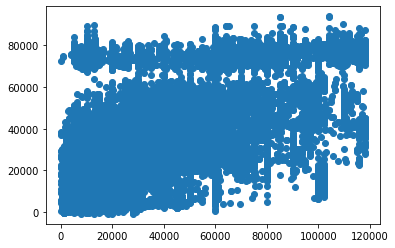

In [76]:
plt.scatter(y,y_pred)

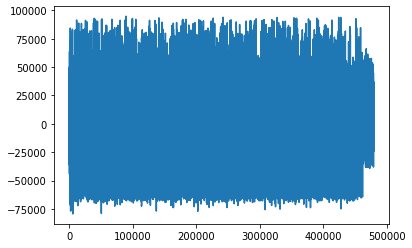

In [77]:
# They should form a white noise 
plt.plot((y-y_pred))

In [78]:
resid=y-y_pred

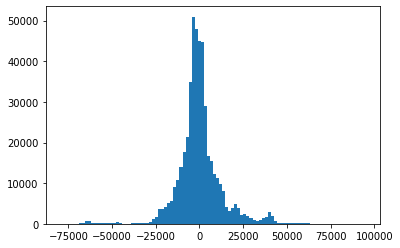

In [79]:
# And they should follow normal distribution
plt.hist(resid,bins=100);

#### Created a new DF : df_dum, where all categorical columns is transformed into dummy columns
#### y=df.CLAIM_AMOUNT
#### X=df_dum
#############################################################################################################################

### Checking Assumptions

In [85]:
model_fit.save("fitted_model_.pickle")

In [86]:
y_extract=y.to_csv('claim_amount')

In [88]:
x_extract=X.to_csv('df_cleaned')

#### Multicollinearity

In [89]:
X.corr()

,AGE,DIS_SUR_DAYS,SURG_MONTH,SURG_YEAR,AGE_SQRD,SEX_male,CASTE_NAME_Minorities,CASTE_NAME_SC,CATEGORY_NAME_CARDIOLOGY,CATEGORY_NAME_CRITICAL CARE,...,HOSP_DISTRICT_Krishna,HOSP_DISTRICT_Nellore,HOSP_DISTRICT_Prakasam,HOSP_DISTRICT_Ranga Reddy,HOSP_DISTRICT_Srikakulam,HOSP_DISTRICT_Vishakhapatnam,MORTALITY_YN_YES,SRC_REGISTRATION_D,SRC_REGISTRATION_MC,SRC_REGISTRATION_P
AGE,1.000000,0.012260,-0.004099,0.046353,0.957355,-0.051919,-0.020490,-0.055604,0.103935,0.022703,...,0.044369,0.055769,-0.008659,0.003124,-0.028429,-0.020752,0.020998,-0.044991,0.067709,0.052825
DIS_SUR_DAYS,0.012260,1.000000,0.009419,-0.137668,-0.006146,0.089690,-0.006992,0.016382,-0.053604,0.004598,...,-0.013083,0.101105,0.068011,0.011349,0.013718,0.003146,0.003384,-0.082810,-0.007767,0.080303
SURG_MONTH,-0.004099,0.009419,1.000000,-0.616459,-0.003102,0.001437,-0.000843,0.004545,0.010209,-0.000068,...,0.005929,0.011022,0.005837,-0.000078,0.005974,-0.006204,-0.000467,-0.003980,0.001889,0.001852
SURG_YEAR,0.046353,-0.137668,-0.616459,1.000000,0.036488,-0.032091,-0.004215,-0.014859,-0.033169,-0.009037,...,0.005513,0.004601,0.000351,-0.029625,0.010427,-0.020372,-0.052827,0.070966,-0.000063,-0.018581
AGE_SQRD,0.957355,-0.006146,-0.003102,0.036488,1.000000,-0.045597,-0.021888,-0.058420,0.097861,0.024030,...,0.039865,0.056243,0.000957,-0.000029,-0.026802,-0.032422,0.031863,-0.042132,0.068753,0.041469
SEX_male,-0.051919,0.089690,0.001437,-0.032091,-0.045597,1.000000,0.003535,0.002997,0.047439,0.011406,...,0.014368,0.038999,0.009807,-0.001519,0.024959,-0.029386,0.017000,-0.001119,-0.014551,0.012354
CASTE_NAME_Minorities,-0.020490,-0.006992,-0.000843,-0.004215,-0.021888,0.003535,1.000000,-0.111045,0.026964,0.002336,...,0.002692,-0.002662,-0.022390,0.001909,-0.046473,-0.082401,0.001305,0.019162,-0.012103,0.002451
CASTE_NAME_SC,-0.055604,0.016382,0.004545,-0.014859,-0.058420,0.002997,-0.111045,1.000000,0.005252,0.010364,...,0.042469,0.040748,0.069739,-0.000165,-0.042945,-0.082962,0.006143,-0.015529,0.011291,0.008680
CATEGORY_NAME_CARDIOLOGY,0.103935,-0.053604,0.010209,-0.033169,0.097861,0.047439,0.026964,0.005252,1.000000,-0.014213,...,0.066376,0.002087,-0.016385,0.009387,0.016330,-0.027496,0.033268,0.018233,0.002724,-0.005482
CATEGORY_NAME_CRITICAL CARE,0.022703,0.004598,-0.000068,-0.009037,0.024030,0.011406,0.002336,0.010364,-0.014213,1.000000,...,-0.020762,0.117822,-0.007945,-0.003548,-0.007743,-0.023165,0.099911,0.006690,0.004831,-0.003588


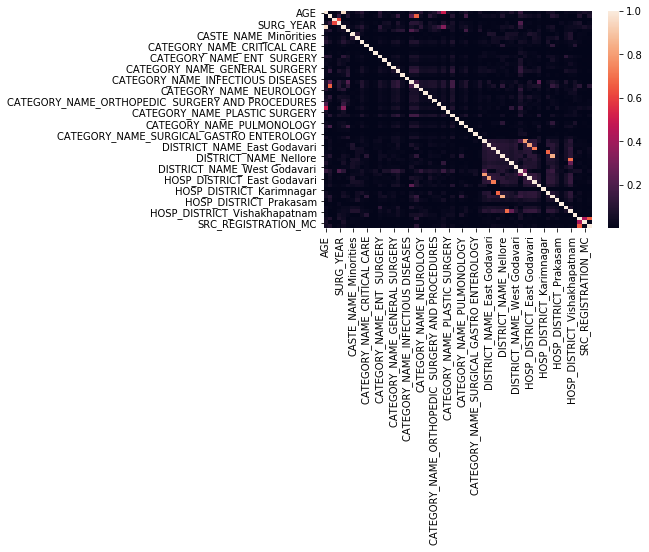

In [90]:
sns.heatmap(abs(X.corr()))

In [91]:
#Importing Library
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [92]:
vifs=pd.Series([VIF(X.values,i) for i in range(X.shape[1])],index=X.columns)

In [93]:
vifs[vifs>10]

AGE                   185.462034
SURG_YEAR              96.493119
AGE_SQRD               74.383963
SRC_REGISTRATION_D     31.819588
dtype: float64

In [94]:
#Function to drop multi-collinear columns and recalculating VIFS
def func_2(column, X):
    if column:
        X=X.drop(column, axis=1)
    vifs=pd.Series([VIF(X.values,i) for i in range(X.shape[1])],index=X.columns)
    display(vifs[vifs>10])
    droped_col.append(column)
    return X

In [101]:
#Had to remove SURG_YEAR, SRC_REGISTRATION_D, AND AGE_SQRD (Since I cant leave a quadratic without it's linear version)
X=func_2('AGE_SQRD', X)

Series([], dtype: float64)

In [103]:
#Update Fitted Model
model=sm.OLS(y,add_constant(X))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           CLAIM_AMOUNT   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                 1.665e+04
Date:                Fri, 01 May 2020   Prob (F-statistic):               0.00
Time:                        23:38:32   Log-Likelihood:            -5.1183e+06
No. Observations:              470268   AIC:                         1.024e+07
Df Residuals:                  470211   BIC:                         1.024e+07
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                              7.192e+04    118.540    606.713      0.000    7.17e+04    7.22e+04
AGE                                                   8.5695      1.253      6.837      0.000       6.113      11.026
DIS_SUR_DAYS                                        279.8333      2.455    113.979      0.000     275.021     284.645
SURG_MONTH                                           11.6347      5.701      2.041      0.041       0.461      22.809
SEX_male                                            795.9123     41.115     19.358      0.000     715.328     876.496
CASTE_NAME_Minorities                               157.6952     80.988      1.947      0.052      -1.039     316.430
CASTE_NAME_SC                                      -270.0791     52.547     -5.140      0.000    -373.070    -167.088
CATEGORY_NAME_CARDIOLOGY                          -4.841e+04    115.484   -419.172      0.000   -4.86e+04   -4.82e+04
CATEGORY_NAME_CRITICAL CARE                       -2.494e+04    281.353    -88.635      0.000   -2.55e+04   -2.44e+04
CATEGORY_NAME_DERMATOLOGY                         -5.122e+04   1435.679    -35.674      0.000    -5.4e+04   -4.84e+04
CATEGORY_NAME_ENDOCRINOLOGY                        -5.67e+04    578.538    -98.003      0.000   -5.78e+04   -5.56e+04
CATEGORY_NAME_ENT  SURGERY                        -5.796e+04    139.834   -414.469      0.000   -5.82e+04   -5.77e+04
CATEGORY_NAME_GASTROENTEROLOGY                    -4.949e+04    217.834   -227.196      0.000   -4.99e+04   -4.91e+04
CATEGORY_NAME_GENERAL MEDICINE                    -5.053e+04    358.385   -141.001      0.000   -5.12e+04   -4.98e+04
CATEGORY_NAME_GENERAL SURGERY                     -4.568e+04    108.885   -419.542      0.000   -4.59e+04   -4.55e+04
CATEGORY_NAME_GENITO URINARY SURGERIES            -4.699e+04     94.070   -499.527      0.000   -4.72e+04   -4.68e+04
CATEGORY_NAME_GYNAECOLOGY AND OBSTETRICS  SURGERY -4.968e+04    225.834   -219.992      0.000   -5.01e+04   -4.92e+04
CATEGORY_NAME_INFECTIOUS DISEASES                 -4.872e+04   5769.662     -8.444      0.000      -6e+04   -3.74e+04
CATEGORY_NAME_MEDICAL ONCOLOGY                    -6.721e+04     84.069   -799.405      0.000   -6.74e+04    -6.7e+04
CATEGORY_NAME_NEPHROLOGY                           -6.62e+04    100.362   -659.657      0.000   -6.64e+04    -6.6e+04
CATEGORY_NAME_NEUROLOGY                           -5.334e+04    132.694   -402.015      0.000   -5.36e+04   -5.31e+04
CATEGORY_NAME_NEUROSURGERY                        -2.489e+04    142.448   -174.727      0.000   -2.52e+04   -2.46e+04
CATEGORY_NAME_OPHTHALMOLOGY  SURGERY               -5.79e+04    126.886   -456.336      0.000   -5.82e+04   -5.77e+04
CATEGORY_NAME_O

In [105]:
#According to our new model, we will have to drop additional column that showed an increase in P-Values
X=func('CASTE_NAME_Minorities',X)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           CLAIM_AMOUNT   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                 1.727e+04
Date:                Fri, 01 May 2020   Prob (F-statistic):               0.00
Time:                        23:41:47   Log-Likelihood:            -5.1183e+06
No. Observations:              470268   AIC:                         1.024e+07
Df Residuals:                  470213   BIC:                         1.024e+07
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                              7.195e+04    117.539    612.141      0.000    7.17e+04    7.22e+04
AGE                                                   8.4316      1.250      6.745      0.000       5.982      10.882
DIS_SUR_DAYS                                        279.8451      2.455    113.984      0.000     275.033     284.657
SURG_MONTH                                           11.6230      5.701      2.039      0.041       0.449      22.797
SEX_male                                            795.7865     41.112     19.357      0.000     715.208     876.365
CASTE_NAME_SC                                      -282.9026     52.159     -5.424      0.000    -385.133    -180.672
CATEGORY_NAME_CARDIOLOGY                          -4.841e+04    115.481   -419.167      0.000   -4.86e+04   -4.82e+04
CATEGORY_NAME_CRITICAL CARE                       -2.494e+04    281.349    -88.647      0.000   -2.55e+04   -2.44e+04
CATEGORY_NAME_DERMATOLOGY                         -5.122e+04   1435.677    -35.678      0.000    -5.4e+04   -4.84e+04
CATEGORY_NAME_ENDOCRINOLOGY                        -5.67e+04    578.537    -98.006      0.000   -5.78e+04   -5.56e+04
CATEGORY_NAME_ENT  SURGERY                        -5.796e+04    139.821   -414.539      0.000   -5.82e+04   -5.77e+04
CATEGORY_NAME_GASTROENTEROLOGY                    -4.949e+04    217.831   -227.208      0.000   -4.99e+04   -4.91e+04
CATEGORY_NAME_GENERAL MEDICINE                    -5.054e+04    358.377   -141.018      0.000   -5.12e+04   -4.98e+04
CATEGORY_NAME_GENERAL SURGERY                     -4.569e+04    108.867   -419.649      0.000   -4.59e+04   -4.55e+04
CATEGORY_NAME_GENITO URINARY SURGERIES              -4.7e+04     94.041   -499.729      0.000   -4.72e+04   -4.68e+04
CATEGORY_NAME_GYNAECOLOGY AND OBSTETRICS  SURGERY -4.969e+04    225.828   -220.015      0.000   -5.01e+04   -4.92e+04
CATEGORY_NAME_INFECTIOUS DISEASES                 -4.873e+04   5769.671     -8.446      0.000      -6e+04   -3.74e+04
CATEGORY_NAME_MEDICAL ONCOLOGY                    -6.721e+04     84.050   -799.626      0.000   -6.74e+04    -6.7e+04
CATEGORY_NAME_NEPHROLOGY                          -6.621e+04    100.348   -659.784      0.000   -6.64e+04    -6.6e+04
CATEGORY_NAME_NEUROLOGY                           -5.335e+04    132.690   -402.042      0.000   -5.36e+04   -5.31e+04
CATEGORY_NAME_NEUROSURGERY                         -2.49e+04    142.420   -174.803      0.000   -2.52e+04   -2.46e+04
CATEGORY_NAME_OPHTHALMOLOGY  SURGERY              -5.791e+04    126.881   -456.374      0.000   -5.82e+04   -5.77e+04
CATEGORY_NAME_ORTHOPEDIC  SURGERY AND PROCEDURES  -5.189e+04    124.383   -417.215      0.000   -5.21e+04   -5.17e+04
CATEGORY_NAME_P

In [109]:
#Update Fitted Model
model=sm.OLS(y,add_constant(X))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           CLAIM_AMOUNT   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                 1.727e+04
Date:                Fri, 01 May 2020   Prob (F-statistic):               0.00
Time:                        23:44:40   Log-Likelihood:            -5.1183e+06
No. Observations:              470268   AIC:                         1.024e+07
Df Residuals:                  470213   BIC:                         1.024e+07
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                              7.195e+04    117.539    612.141      0.000    7.17e+04    7.22e+04
AGE                                                   8.4316      1.250      6.745      0.000       5.982      10.882
DIS_SUR_DAYS                                        279.8451      2.455    113.984      0.000     275.033     284.657
SURG_MONTH                                           11.6230      5.701      2.039      0.041       0.449      22.797
SEX_male                                            795.7865     41.112     19.357      0.000     715.208     876.365
CASTE_NAME_SC                                      -282.9026     52.159     -5.424      0.000    -385.133    -180.672
CATEGORY_NAME_CARDIOLOGY                          -4.841e+04    115.481   -419.167      0.000   -4.86e+04   -4.82e+04
CATEGORY_NAME_CRITICAL CARE                       -2.494e+04    281.349    -88.647      0.000   -2.55e+04   -2.44e+04
CATEGORY_NAME_DERMATOLOGY                         -5.122e+04   1435.677    -35.678      0.000    -5.4e+04   -4.84e+04
CATEGORY_NAME_ENDOCRINOLOGY                        -5.67e+04    578.537    -98.006      0.000   -5.78e+04   -5.56e+04
CATEGORY_NAME_ENT  SURGERY                        -5.796e+04    139.821   -414.539      0.000   -5.82e+04   -5.77e+04
CATEGORY_NAME_GASTROENTEROLOGY                    -4.949e+04    217.831   -227.208      0.000   -4.99e+04   -4.91e+04
CATEGORY_NAME_GENERAL MEDICINE                    -5.054e+04    358.377   -141.018      0.000   -5.12e+04   -4.98e+04
CATEGORY_NAME_GENERAL SURGERY                     -4.569e+04    108.867   -419.649      0.000   -4.59e+04   -4.55e+04
CATEGORY_NAME_GENITO URINARY SURGERIES              -4.7e+04     94.041   -499.729      0.000   -4.72e+04   -4.68e+04
CATEGORY_NAME_GYNAECOLOGY AND OBSTETRICS  SURGERY -4.969e+04    225.828   -220.015      0.000   -5.01e+04   -4.92e+04
CATEGORY_NAME_INFECTIOUS DISEASES                 -4.873e+04   5769.671     -8.446      0.000      -6e+04   -3.74e+04
CATEGORY_NAME_MEDICAL ONCOLOGY                    -6.721e+04     84.050   -799.626      0.000   -6.74e+04    -6.7e+04
CATEGORY_NAME_NEPHROLOGY                          -6.621e+04    100.348   -659.784      0.000   -6.64e+04    -6.6e+04
CATEGORY_NAME_NEUROLOGY                           -5.335e+04    132.690   -402.042      0.000   -5.36e+04   -5.31e+04
CATEGORY_NAME_NEUROSURGERY                         -2.49e+04    142.420   -174.803      0.000   -2.52e+04   -2.46e+04
CATEGORY_NAME_OPHTHALMOLOGY  SURGERY              -5.791e+04    126.881   -456.374      0.000   -5.82e+04   -5.77e+04
CATEGORY_NAME_ORTHOPEDIC  SURGERY AND PROCEDURES  -5.189e+04    124.383   -417.215      0.000   -5.21e+04   -5.17e+04
CATEGORY_NAME_P

#### AutoCorrelation

In [111]:
#Importing Library
from statsmodels.stats.stattools import durbin_watson

In [113]:
resid=model_fit.resid

In [114]:
durbin_watson(resid)

1.9028961101274047

#### Linearity

In [115]:
X.nunique()[X.nunique()>2].index

Index(['AGE', 'DIS_SUR_DAYS', 'SURG_MONTH'], dtype='object')

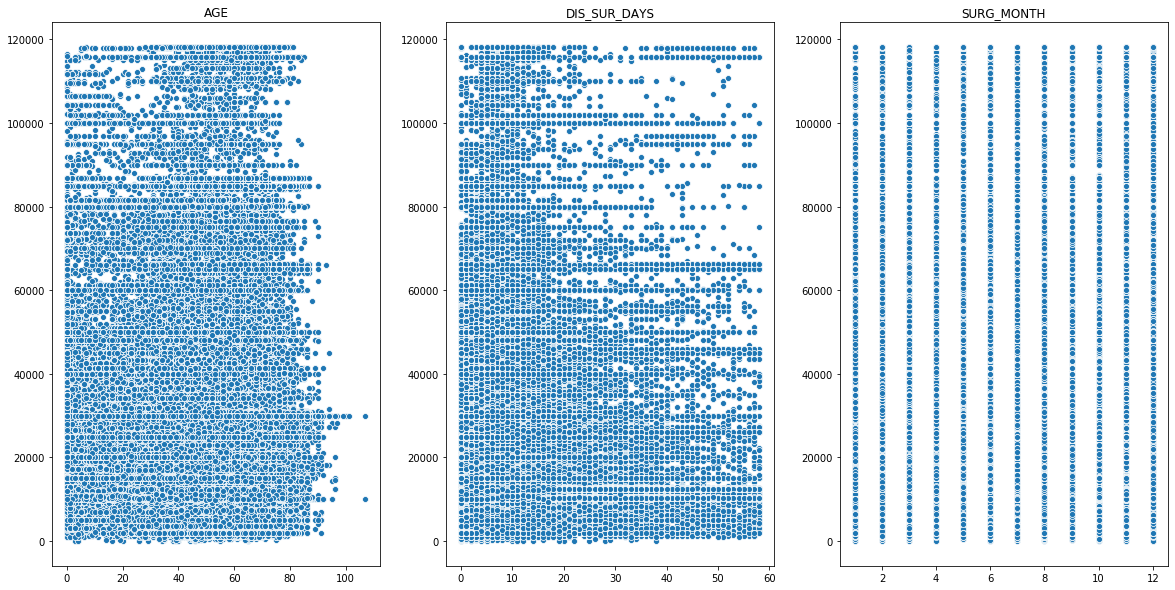

In [120]:
_,axes=plt.subplots(1,3,figsize=(20,10))
for idx,col in enumerate(X.nunique()[X.nunique()>2].index):
    sns.scatterplot(x=X[col].values,y=y.values.ravel(), ax=axes[idx]).set_title(col)

In [122]:
y_pred=model_fit.predict(add_constant(X))

In [123]:
y_pred

0         11563.201946
1         12198.787141
3         12825.930568
4         12342.125108
5         11486.392687
              ...     
479683    24168.448169
479684     8581.728653
479685    27661.868354
479686    18357.658305
479687    16715.166587
Length: 470268, dtype: float64

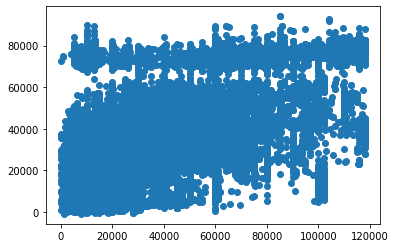

In [124]:
plt.scatter(y, y_pred)

In [125]:
data=pd.concat([y,y_pred],axis=1)

In [128]:
data.columns=['ClaimAmount','Pred']

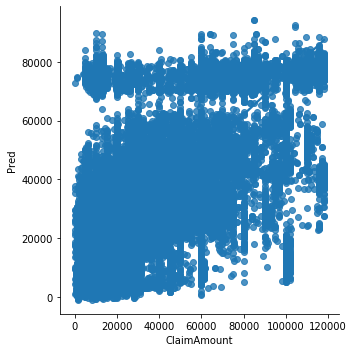

In [129]:
sns.lmplot(x='ClaimAmount', y='Pred', data=data)

In [130]:
from statsmodels.stats.diagnostic import linear_harvey_collier

In [133]:
linear_harvey_collier(model_fit)

LinAlgError: Singular matrix

In [135]:
#Remove Outliers above 75 percentile, based on the seperation shown above
X=X.drop(df.loc[df['CLAIM_AMOUNT'] > df['CLAIM_AMOUNT'].quantile(q=0.75)].index)
y=y.drop(df.loc[df['CLAIM_AMOUNT'] > df['CLAIM_AMOUNT'].quantile(q=0.75)].index)

In [137]:
y_pred=model_fit.predict(add_constant(X))

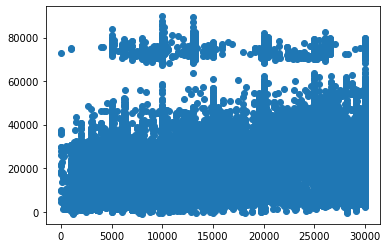

In [138]:
plt.scatter(y, y_pred)

In [147]:
#Update Fitted Model
model=sm.OLS(y,add_constant(X))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           CLAIM_AMOUNT   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                 1.111e+04
Date:                Sat, 02 May 2020   Prob (F-statistic):               0.00
Time:                        00:08:18   Log-Likelihood:            -3.5455e+06
No. Observations:              353050   AIC:                         7.091e+06
Df Residuals:                  352995   BIC:                         7.092e+06
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                              1.478e+04    100.478    147.118      0.000    1.46e+04     1.5e+04
AGE                                                  23.4326      0.622     37.694      0.000      22.214      24.651
DIS_SUR_DAYS                                        -31.1493      1.326    -23.492      0.000     -33.748     -28.550
SURG_MONTH                                           15.8863      2.833      5.607      0.000      10.333      21.440
SEX_male                                            293.8731     20.653     14.229      0.000     253.394     334.352
CASTE_NAME_SC                                       -91.3682     25.929     -3.524      0.000    -142.188     -40.549
CATEGORY_NAME_CARDIOLOGY                           7649.7515     99.576     76.824      0.000    7454.586    7844.917
CATEGORY_NAME_CRITICAL CARE                        8596.6449    299.459     28.707      0.000    8009.713    9183.577
CATEGORY_NAME_DERMATOLOGY                          6762.2502    644.466     10.493      0.000    5499.116    8025.384
CATEGORY_NAME_ENDOCRINOLOGY                         179.7220    264.670      0.679      0.497    -339.023     698.467
CATEGORY_NAME_ENT  SURGERY                         -304.0954    103.561     -2.936      0.003    -507.073    -101.118
CATEGORY_NAME_GASTROENTEROLOGY                     4034.4368    136.052     29.654      0.000    3767.778    4301.095
CATEGORY_NAME_GENERAL MEDICINE                     4986.5565    184.286     27.059      0.000    4625.362    5347.751
CATEGORY_NAME_GENERAL SURGERY                      8402.9545     98.204     85.566      0.000    8210.478    8595.431
CATEGORY_NAME_GENITO URINARY SURGERIES             7340.7186     95.409     76.940      0.000    7153.720    7527.717
CATEGORY_NAME_GYNAECOLOGY AND OBSTETRICS  SURGERY  7560.1720    131.160     57.641      0.000    7303.102    7817.242
CATEGORY_NAME_INFECTIOUS DISEASES                  1.189e+04   2488.793      4.777      0.000    7010.163    1.68e+04
CATEGORY_NAME_MEDICAL ONCOLOGY                    -1.012e+04     91.754   -110.272      0.000   -1.03e+04   -9938.054
CATEGORY_NAME_NEPHROLOGY                          -1834.2961     96.663    -18.976      0.000   -2023.752   -1644.840
CATEGORY_NAME_NEUROLOGY                            3462.6196    102.700     33.716      0.000    3261.331    3663.908
CATEGORY_NAME_NEUROSURGERY                         1.234e+04    142.662     86.480      0.000    1.21e+04    1.26e+04
CATEGORY_NAME_OPHTHALMOLOGY  SURGERY              -1577.8127    100.978    -15.625      0.000   -1775.726   -1379.899
CATEGORY_NAME_ORTHOPEDIC  SURGERY AND PROCEDURES   2912.7457    103.130     28.243      0.000    2710.613    3114.878
CATEGORY_NAME_P

In [154]:
#According to our new model, we will have to drop additional column that showed an increase in P-Values
X=func('HOSP_DISTRICT_Chittoor',X)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           CLAIM_AMOUNT   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                 1.277e+04
Date:                Sat, 02 May 2020   Prob (F-statistic):               0.00
Time:                        00:11:21   Log-Likelihood:            -3.5455e+06
No. Observations:              353050   AIC:                         7.091e+06
Df Residuals:                  353002   BIC:                         7.092e+06
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                              1.481e+04     94.802    156.266      0.000    1.46e+04     1.5e+04
AGE                                                  23.4117      0.622     37.668      0.000      22.194      24.630
DIS_SUR_DAYS                                        -31.3027      1.322    -23.675      0.000     -33.894     -28.711
SURG_MONTH                                           15.8748      2.833      5.603      0.000      10.322      21.428
SEX_male                                            293.9047     20.647     14.235      0.000     253.437     334.373
CASTE_NAME_SC                                       -92.5191     25.909     -3.571      0.000    -143.300     -41.738
CATEGORY_NAME_CARDIOLOGY                           7626.3817     94.967     80.306      0.000    7440.249    7812.514
CATEGORY_NAME_CRITICAL CARE                        8565.1025    297.910     28.751      0.000    7981.208    9148.997
CATEGORY_NAME_DERMATOLOGY                          6736.5917    643.702     10.465      0.000    5474.954    7998.229
CATEGORY_NAME_ENT  SURGERY                         -333.3722     98.885     -3.371      0.001    -527.183    -139.561
CATEGORY_NAME_GASTROENTEROLOGY                     4001.3670    132.389     30.224      0.000    3741.888    4260.846
CATEGORY_NAME_GENERAL MEDICINE                     4956.0028    181.594     27.292      0.000    4600.083    5311.922
CATEGORY_NAME_GENERAL SURGERY                      8375.5991     93.243     89.826      0.000    8192.846    8558.353
CATEGORY_NAME_GENITO URINARY SURGERIES             7318.4535     90.600     80.777      0.000    7140.880    7496.027
CATEGORY_NAME_GYNAECOLOGY AND OBSTETRICS  SURGERY  7531.2267    127.354     59.136      0.000    7281.618    7780.836
CATEGORY_NAME_INFECTIOUS DISEASES                  1.188e+04   2488.582      4.774      0.000    7001.770    1.68e+04
CATEGORY_NAME_MEDICAL ONCOLOGY                    -1.014e+04     86.680   -116.998      0.000   -1.03e+04   -9971.491
CATEGORY_NAME_NEPHROLOGY                          -1859.5805     91.804    -20.256      0.000   -2039.514   -1679.647
CATEGORY_NAME_NEUROLOGY                            3433.9786     98.011     35.037      0.000    3241.881    3626.076
CATEGORY_NAME_NEUROSURGERY                         1.231e+04    139.257     88.399      0.000     1.2e+04    1.26e+04
CATEGORY_NAME_OPHTHALMOLOGY  SURGERY              -1611.3497     96.299    -16.733      0.000   -1800.093   -1422.606
CATEGORY_NAME_ORTHOPEDIC  SURGERY AND PROCEDURES   2891.4500     98.686     29.299      0.000    2698.028    3084.872
CATEGORY_NAME_PEDIATRIC SURGERIES                  5614.5647    142.776     39.324      0.000    5334.729    5894.401
CATEGORY_NAME_P

In [155]:
#Update Fitted Model
model=sm.OLS(y,add_constant(X))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           CLAIM_AMOUNT   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                 1.277e+04
Date:                Sat, 02 May 2020   Prob (F-statistic):               0.00
Time:                        00:12:08   Log-Likelihood:            -3.5455e+06
No. Observations:              353050   AIC:                         7.091e+06
Df Residuals:                  353002   BIC:                         7.092e+06
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                              1.481e+04     94.802    156.266      0.000    1.46e+04     1.5e+04
AGE                                                  23.4117      0.622     37.668      0.000      22.194      24.630
DIS_SUR_DAYS                                        -31.3027      1.322    -23.675      0.000     -33.894     -28.711
SURG_MONTH                                           15.8748      2.833      5.603      0.000      10.322      21.428
SEX_male                                            293.9047     20.647     14.235      0.000     253.437     334.373
CASTE_NAME_SC                                       -92.5191     25.909     -3.571      0.000    -143.300     -41.738
CATEGORY_NAME_CARDIOLOGY                           7626.3817     94.967     80.306      0.000    7440.249    7812.514
CATEGORY_NAME_CRITICAL CARE                        8565.1025    297.910     28.751      0.000    7981.208    9148.997
CATEGORY_NAME_DERMATOLOGY                          6736.5917    643.702     10.465      0.000    5474.954    7998.229
CATEGORY_NAME_ENT  SURGERY                         -333.3722     98.885     -3.371      0.001    -527.183    -139.561
CATEGORY_NAME_GASTROENTEROLOGY                     4001.3670    132.389     30.224      0.000    3741.888    4260.846
CATEGORY_NAME_GENERAL MEDICINE                     4956.0028    181.594     27.292      0.000    4600.083    5311.922
CATEGORY_NAME_GENERAL SURGERY                      8375.5991     93.243     89.826      0.000    8192.846    8558.353
CATEGORY_NAME_GENITO URINARY SURGERIES             7318.4535     90.600     80.777      0.000    7140.880    7496.027
CATEGORY_NAME_GYNAECOLOGY AND OBSTETRICS  SURGERY  7531.2267    127.354     59.136      0.000    7281.618    7780.836
CATEGORY_NAME_INFECTIOUS DISEASES                  1.188e+04   2488.582      4.774      0.000    7001.770    1.68e+04
CATEGORY_NAME_MEDICAL ONCOLOGY                    -1.014e+04     86.680   -116.998      0.000   -1.03e+04   -9971.491
CATEGORY_NAME_NEPHROLOGY                          -1859.5805     91.804    -20.256      0.000   -2039.514   -1679.647
CATEGORY_NAME_NEUROLOGY                            3433.9786     98.011     35.037      0.000    3241.881    3626.076
CATEGORY_NAME_NEUROSURGERY                         1.231e+04    139.257     88.399      0.000     1.2e+04    1.26e+04
CATEGORY_NAME_OPHTHALMOLOGY  SURGERY              -1611.3497     96.299    -16.733      0.000   -1800.093   -1422.606
CATEGORY_NAME_ORTHOPEDIC  SURGERY AND PROCEDURES   2891.4500     98.686     29.299      0.000    2698.028    3084.872
CATEGORY_NAME_PEDIATRIC SURGERIES                  5614.5647    142.776     39.324      0.000    5334.729    5894.401
CATEGORY_NAME_P

In [159]:
#Updating Resid Value for below
resid=model_fit.resid

#### Homoskedasticity

In [156]:
from statsmodels.stats.diagnostic import het_breuschpagan

In [160]:
lnames=['Lagrange Multiplier', 'pvalue for LM','F stats','pvalue for Fstats']
{lnames[idx]:het_breuschpagan(resid,X.iloc[:,2:4])[idx] for idx in range(4)}

{'Lagrange Multiplier': 61568.55313121058,
 'pvalue for LM': 0.0,
 'F stats': 37286.51476684278,
 'pvalue for Fstats': 0.0}

In [ ]:
# Since in this case both values are 0, we reject Null Hypothesis and we end up in Heteroskedasticity. 
# Assumption is violated

#### Non-Linear Transformations

In [161]:
X.nunique()[X.nunique()>2].index

Index(['AGE', 'DIS_SUR_DAYS', 'SURG_MONTH'], dtype='object')

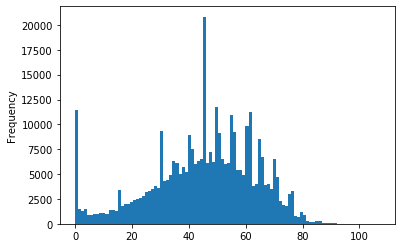

In [162]:
#Age plot looks somewhat good, so will keep it as is
X.AGE.plot.hist(bins=100)

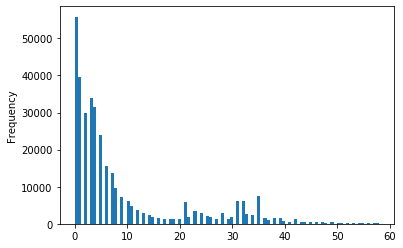

In [163]:
X.DIS_SUR_DAYS.plot.hist(bins=100)

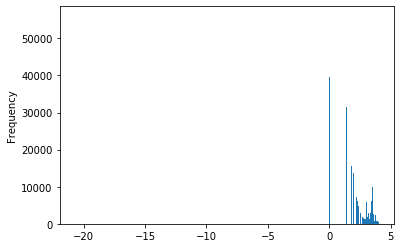

In [175]:
(X.iloc[:,1]+0.000000001).apply(np.log).plot.hist(bins=500)

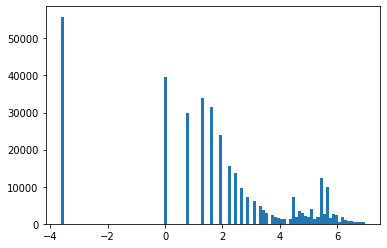

In [170]:
from scipy.stats import boxcox
plt.hist(boxcox(X.DIS_SUR_DAYS+0.0001)[0], bins=100);

In [181]:
# We will log the values of DIS_SUR_DAYS as its graph yielded a better plot than the boxcox
X.DIS_SUR_DAYS=(X.iloc[:,1]+0.000000001).apply(np.log)

In [186]:
model=sm.OLS(y,add_constant(X))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           CLAIM_AMOUNT   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                 1.279e+04
Date:                Sat, 02 May 2020   Prob (F-statistic):               0.00
Time:                        00:43:15   Log-Likelihood:            -3.5453e+06
No. Observations:              353050   AIC:                         7.091e+06
Df Residuals:                  353002   BIC:                         7.091e+06
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                              1.464e+04     94.617    154.734      0.000    1.45e+04    1.48e+04
AGE                                                  23.6156      0.621     38.016      0.000      22.398      24.833
DIS_SUR_DAYS                                         45.9027      1.477     31.068      0.000      43.007      48.799
SURG_MONTH                                           17.2851      2.832      6.104      0.000      11.735      22.835
SEX_male                                            265.0822     20.636     12.846      0.000     224.636     305.528
CASTE_NAME_SC                                      -103.1908     25.893     -3.985      0.000    -153.941     -52.441
CATEGORY_NAME_CARDIOLOGY                           7573.4588     94.895     79.809      0.000    7387.468    7759.450
CATEGORY_NAME_CRITICAL CARE                        8581.4882    297.731     28.823      0.000    7997.944    9165.032
CATEGORY_NAME_DERMATOLOGY                          6489.7343    643.285     10.088      0.000    5228.915    7750.553
CATEGORY_NAME_ENT  SURGERY                         -291.9252     98.806     -2.955      0.003    -485.583     -98.267
CATEGORY_NAME_GASTROENTEROLOGY                     4069.7725    132.344     30.751      0.000    3810.382    4329.163
CATEGORY_NAME_GENERAL MEDICINE                     4988.1573    181.497     27.483      0.000    4632.428    5343.887
CATEGORY_NAME_GENERAL SURGERY                      8234.1330     93.186     88.363      0.000    8051.492    8416.774
CATEGORY_NAME_GENITO URINARY SURGERIES             7348.1916     90.536     81.163      0.000    7170.744    7525.639
CATEGORY_NAME_GYNAECOLOGY AND OBSTETRICS  SURGERY  7317.3887    127.251     57.504      0.000    7067.981    7566.796
CATEGORY_NAME_INFECTIOUS DISEASES                  1.141e+04   2487.127      4.589      0.000    6537.668    1.63e+04
CATEGORY_NAME_MEDICAL ONCOLOGY                    -9597.8331     87.910   -109.178      0.000   -9770.133   -9425.533
CATEGORY_NAME_NEPHROLOGY                          -2683.9286     86.586    -30.997      0.000   -2853.635   -2514.222
CATEGORY_NAME_NEUROLOGY                            3466.0778     97.966     35.381      0.000    3274.068    3658.088
CATEGORY_NAME_NEUROSURGERY                         1.207e+04    139.103     86.747      0.000    1.18e+04    1.23e+04
CATEGORY_NAME_OPHTHALMOLOGY  SURGERY              -1409.0805     96.251    -14.640      0.000   -1597.729   -1220.432
CATEGORY_NAME_ORTHOPEDIC  SURGERY AND PROCEDURES   2778.0301     98.617     28.170      0.000    2584.743    2971.317
CATEGORY_NAME_PEDIATRIC SURGERIES                  5507.7019    142.691     38.599      0.000    5228.032    5787.372
CATEGORY_NAME_P

In [187]:
#Updating Resid Value for below
resid=model_fit.resid

In [184]:
y_pred=model_fit.predict(add_constant(X))

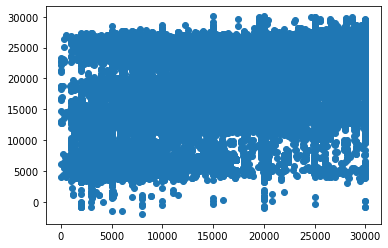

In [189]:
plt.scatter(y, y_pred)

In [185]:
from statsmodels.tools.eval_measures import rmse
rmse(y,y_pred)

5594.988326293807

#### Exogeneity of Residuals

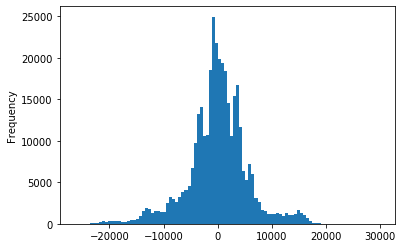

In [188]:
resid.plot.hist(bins=100)

In [190]:
# Goodness of fit, or whether our series follow specific distribution
from scipy.stats import kstest
kstest(resid, 'norm') 

KstestResult(statistic=0.5059311432517806, pvalue=0.0)

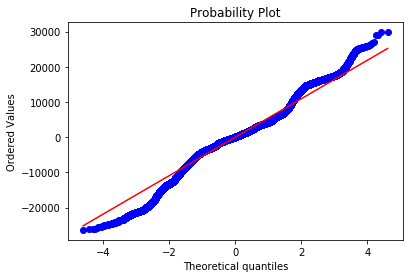

In [191]:
from scipy.stats import probplot
import pylab
probplot(resid, dist='norm', plot=pylab);

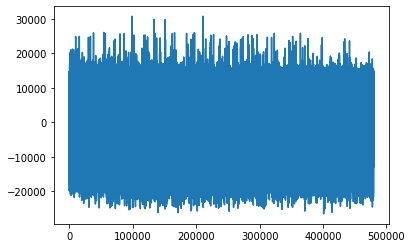

In [193]:
#White Noise
plt.plot(y-y_pred)